<a href="https://colab.research.google.com/github/devashri1432/Federal-Interest-Rates-Prediction-for-2025/blob/devashri/Federal_Interest_Rates_VARMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector AutoRegressive Moving Average (VARMA) Model Implementation

In [ ]:
# Installing Packages
install.packages("vars")
install.packages("forecast")
install.packages("tseries")
install.packages("stats")
install.packages("CADFtest")
install.packages("Metrics")
install.packages("MTS")
update.packages("MTS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘strucchange’, ‘urca’, ‘lmtest’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘timeDate’, ‘tseries’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘dynlm’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’

In [2]:
# Importing Required Libraries
library(vars)
library(forecast)
library(stats)
library(tseries)
library(CADFtest)
library(Metrics)
library(MTS)

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: dynlm

Registered S3 methods overwritten by 'CADFtest':
  method     from    
  bread.mlm  sandwich
  estfun.mlm sandwich


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy



Attaching package: ‘MTS’


The following object is masked from ‘package:vars’:

    VAR




In [44]:
install.packages("lmtest")
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Importing the interest_rates.csv dataset
interest_rates_data <- read.csv("interest_rates.csv")
head(interest_rates_data)

,Date,Inflation.Rate,Unemployment.Rate,Bonds.Yield,FEDFUNDS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1954-07-01,0.4,5.8,2.89,0.80
2,1954-08-01,0.0,6.0,2.87,1.22
3,1954-09-01,-0.4,6.1,2.89,1.07
4,1954-10-01,-0.7,5.7,2.87,0.85
5,1954-11-01,-0.4,5.3,2.89,0.83
6,1954-12-01,-0.7,5.0,2.90,1.28


In [4]:
interest_rates_data$Date <- as.Date(interest_rates_data$Date) # Changing the Date column to Date Type
head(interest_rates_data)

,Date,Inflation.Rate,Unemployment.Rate,Bonds.Yield,FEDFUNDS
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,1954-07-01,0.4,5.8,2.89,0.80
2,1954-08-01,0.0,6.0,2.87,1.22
3,1954-09-01,-0.4,6.1,2.89,1.07
4,1954-10-01,-0.7,5.7,2.87,0.85
5,1954-11-01,-0.4,5.3,2.89,0.83
6,1954-12-01,-0.7,5.0,2.90,1.28


In [ ]:
# interest_rates_data$Inflation.Rate <- as.numeric(interest_rates_data$Inflation.Rate)
# interest_rates_data$Unemployment.Rate <- as.numeric(interest_rates_data$Unemployment.Rate)
# interest_rates_data$Bonds.Yield <- as.numeric(interest_rates_data$Bonds.Yield)
# interest_rates_data$FEDFUNDS <- as.numeric(interest_rates_data$FEDFUNDS)

In [5]:
tail(interest_rates_data)

,Date,Inflation.Rate,Unemployment.Rate,Bonds.Yield,FEDFUNDS
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
839,2024-05-01,3.3,4.0,5.25,5.33
840,2024-06-01,3.0,4.1,5.13,5.33
841,2024-07-01,2.9,4.3,5.12,5.33
842,2024-08-01,2.5,4.2,4.87,5.33
843,2024-09-01,2.4,4.1,4.68,5.13
844,2024-10-01,2.6,4.1,4.95,4.83


Identifying Correlation Among Features

In [40]:
corr_bet_inflationRate_FedFunds <- cor(interest_rates_data$Inflation.Rate, interest_rates_data$FEDFUNDS)
corr_bet_UnemploymentRate_FedFunds <- cor(interest_rates_data$Unemployment.Rate, interest_rates_data$FEDFUNDS)
corr_bet_BondsYield_FedFunds <- cor(interest_rates_data$Bonds.Yield, interest_rates_data$FEDFUNDS)

print(corr_bet_inflationRate_FedFunds)
print(corr_bet_UnemploymentRate_FedFunds)
print(corr_bet_BondsYield_FedFunds)

[1] 0.7075551
[1] 0.06348971
[1] 0.8598822


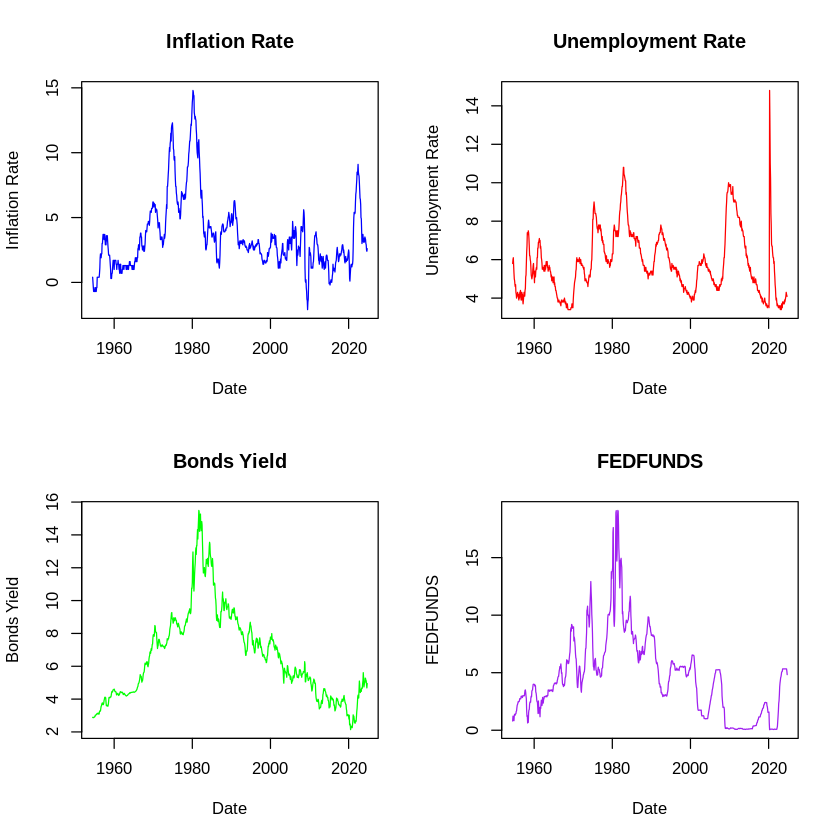

In [6]:
par(mfrow = c(2, 2))

# Plotting individual features
plot(interest_rates_data$Date, interest_rates_data$Inflation.Rate, type = "l", col = "blue",
     xlab = "Date", ylab = "Inflation Rate", main = "Inflation Rate")
plot(interest_rates_data$Date, interest_rates_data$Unemployment.Rate, type = "l", col = "red",
     xlab = "Date", ylab = "Unemployment Rate", main = "Unemployment Rate")
plot(interest_rates_data$Date, interest_rates_data$Bonds.Yield, type = "l", col = "green",
     xlab = "Date", ylab = "Bonds Yield", main = "Bonds Yield")
plot(interest_rates_data$Date, interest_rates_data$FEDFUNDS, type = "l", col = "purple",
     xlab = "Date", ylab = "FEDFUNDS", main = "FEDFUNDS")

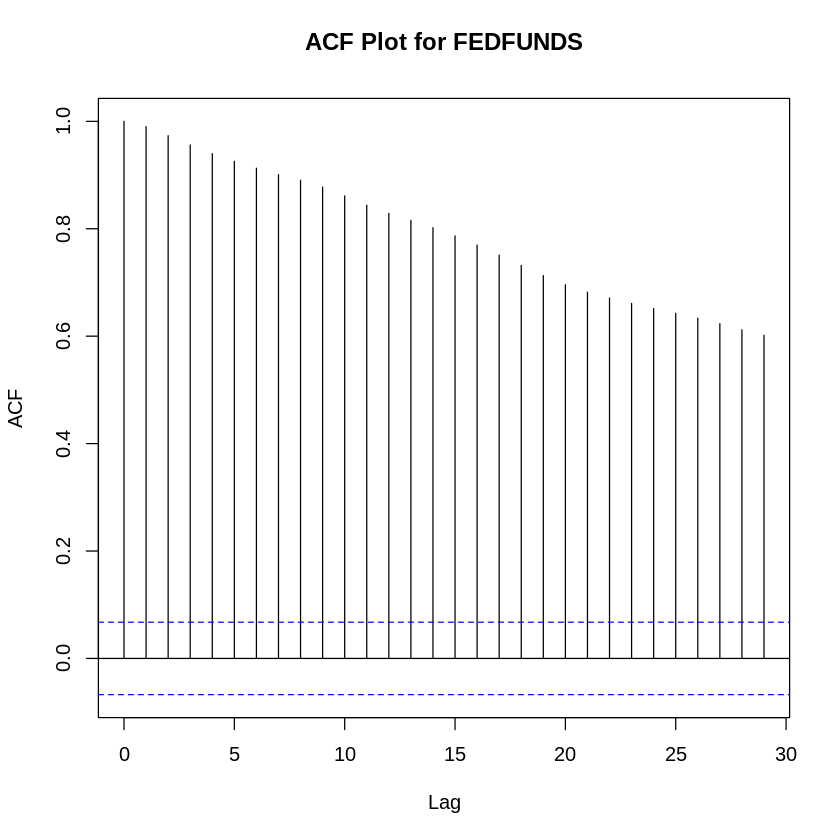

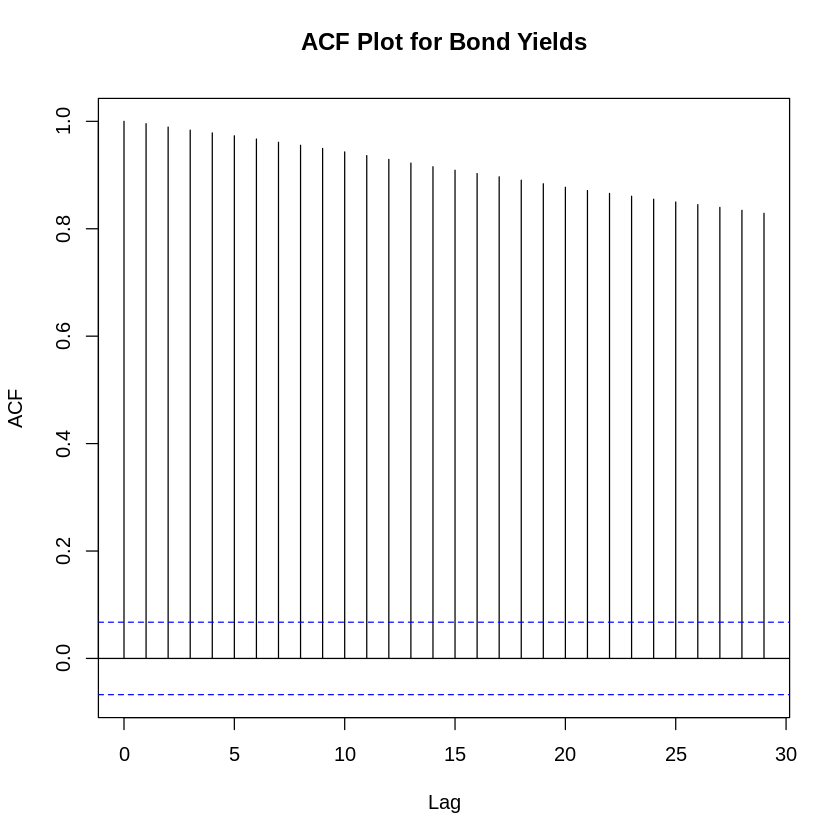

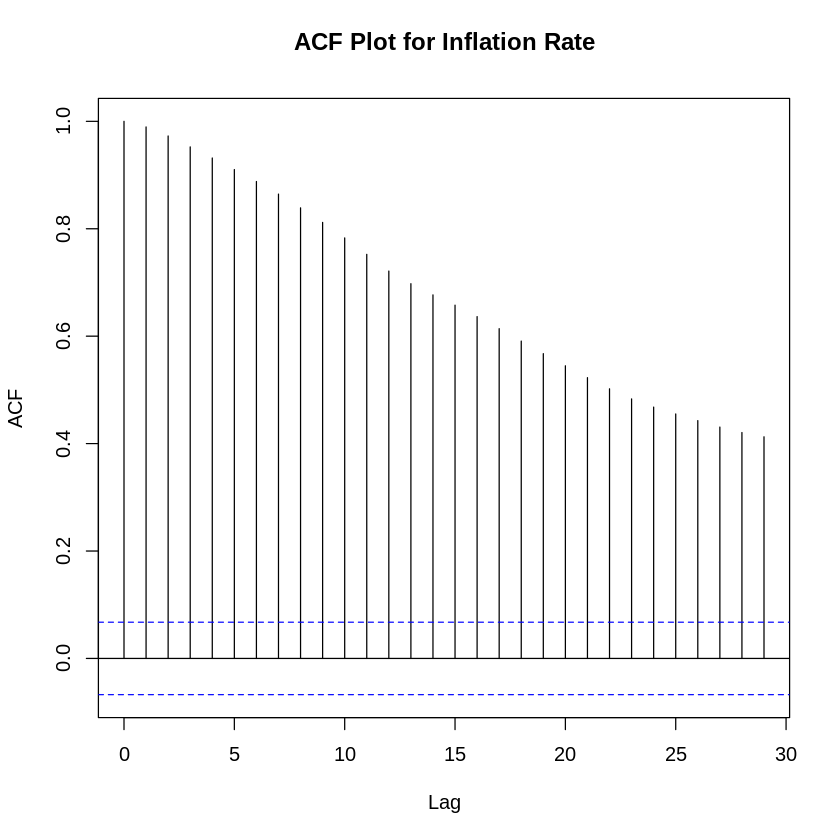

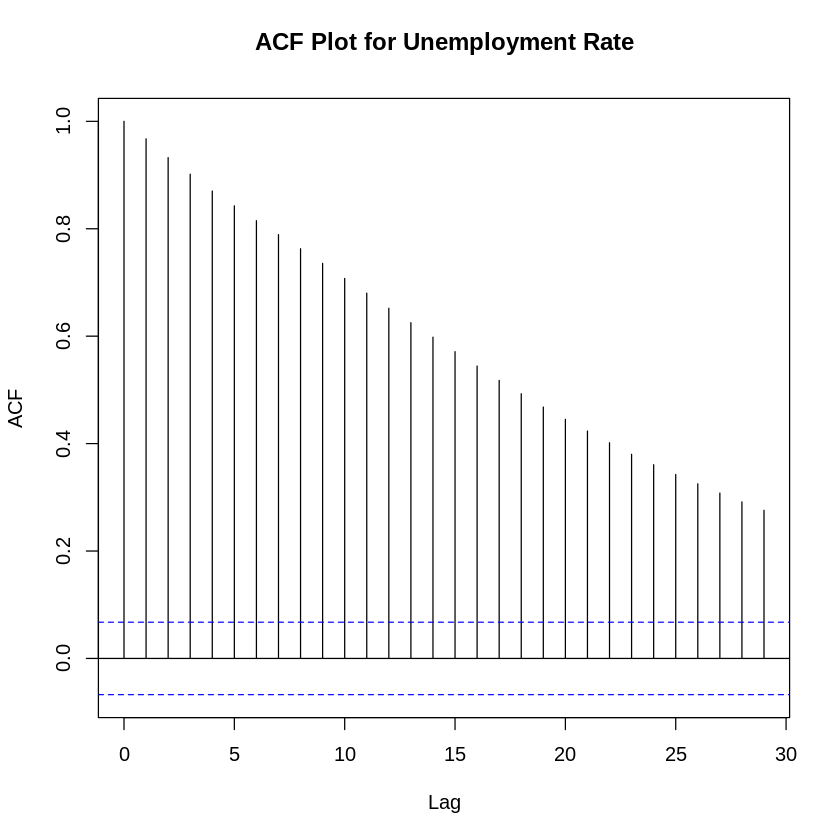

In [7]:
# Making ACF Plots for all the features and identifying whether they are stationary or not
acf(interest_rates_data$FEDFUNDS, main = "ACF Plot for FEDFUNDS")
acf(interest_rates_data$Bonds.Yield, main = "ACF Plot for Bond Yields")
acf(interest_rates_data$Inflation.Rate, main = "ACF Plot for Inflation Rate")
acf(interest_rates_data$Unemployment.Rate, main = "ACF Plot for Unemployment Rate")

Augmented Dickey Fuller (ADF) Test

In [8]:
# Checking for Stationarity
adf_FEDFUNDS <- CADFtest(interest_rates_data$FEDFUNDS, max.lag.y = 10)
print(adf_FEDFUNDS)
adf_InflationRate <- CADFtest(interest_rates_data$Inflation.Rate, max.lag.y = 10)
print(adf_InflationRate)
adf_UnemploymentRate <- CADFtest(interest_rates_data$Unemployment.Rate, max.lag.y = 10)
print(adf_UnemploymentRate)
adf_BondsYield <- CADFtest(interest_rates_data$Bonds.Yield, max.lag.y = 10)
print(adf_BondsYield)


	ADF test

data:  interest_rates_data$FEDFUNDS
ADF(10) = -3.0064, p-value = 0.131
alternative hypothesis: true delta is less than 0
sample estimates:
     delta 
-0.0138774 


	ADF test

data:  interest_rates_data$Inflation.Rate
ADF(10) = -4.4173, p-value = 0.002128
alternative hypothesis: true delta is less than 0
sample estimates:
      delta 
-0.02128272 


	ADF test

data:  interest_rates_data$Unemployment.Rate
ADF(10) = -3.5199, p-value = 0.03788
alternative hypothesis: true delta is less than 0
sample estimates:
     delta 
-0.0332764 


	ADF test

data:  interest_rates_data$Bonds.Yield
ADF(10) = -2.0436, p-value = 0.5759
alternative hypothesis: true delta is less than 0
sample estimates:
       delta 
-0.005276351 



We can clearly see from the results of the Augmented Dickey Fuller (ADF) test that FEDFUNDS and Bonds_Yield have p-values greater than 0.05. So we Fail to Reject H0 and the the series is non-stationary. Thus, we have to make the series stationary.

In [9]:
ndiffs(interest_rates_data$FEDFUNDS)
ndiffs(interest_rates_data$Bonds.Yield)
ndiffs(interest_rates_data$Unemployment.Rate)
ndiffs(interest_rates_data$Inflation.Rate)

[1] 1

[1] 1

[1] 1

[1] 1

Differencing the Time Series Data

In [10]:
interest_rates_data_diff <- interest_rates_data[-1, ]

In [11]:
interest_rates_data_diff$Bonds.Yield <- diff(interest_rates_data$Bonds.Yield)
interest_rates_data_diff$FEDFUNDS <- diff(interest_rates_data$FEDFUNDS)
interest_rates_data_diff$Unemployment.Rate <- diff(interest_rates_data$Unemployment.Rate)
interest_rates_data_diff$Inflation.Rate <- diff(interest_rates_data$Inflation.Rate)

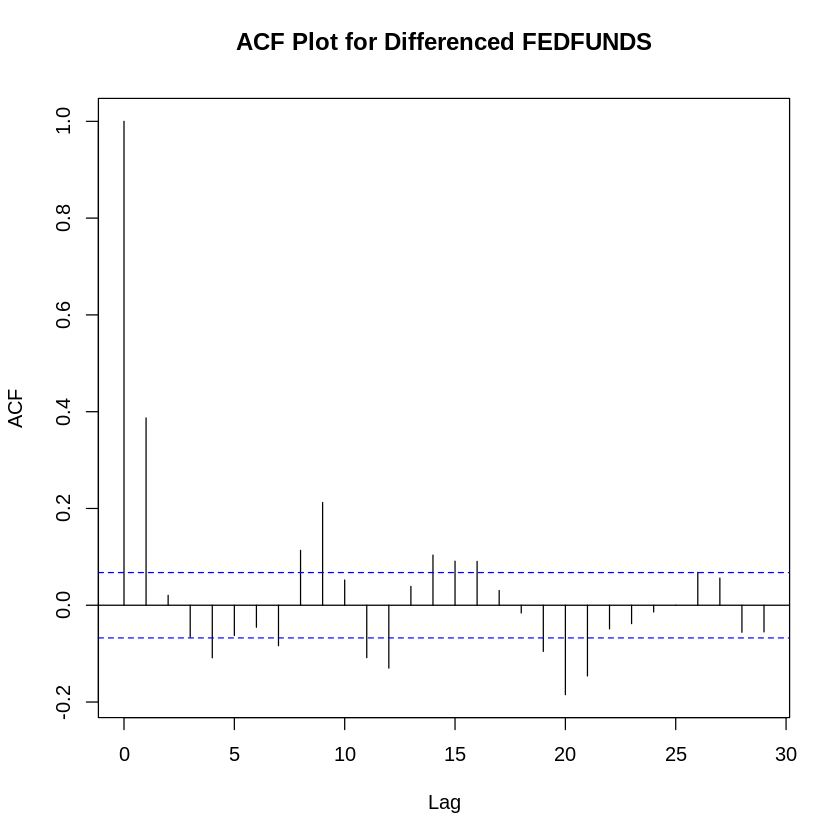

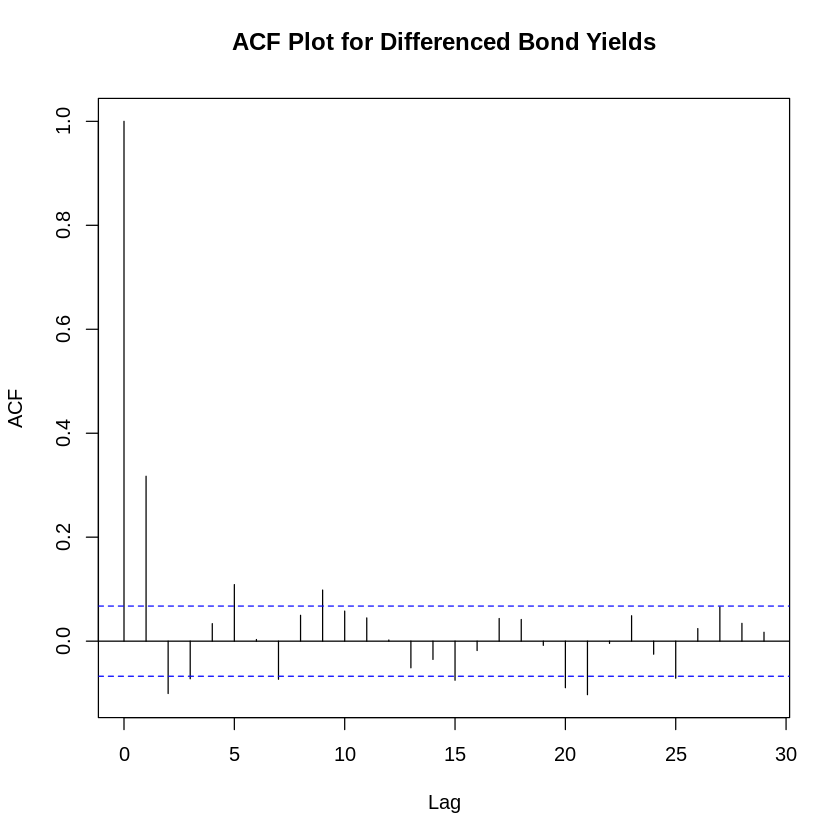

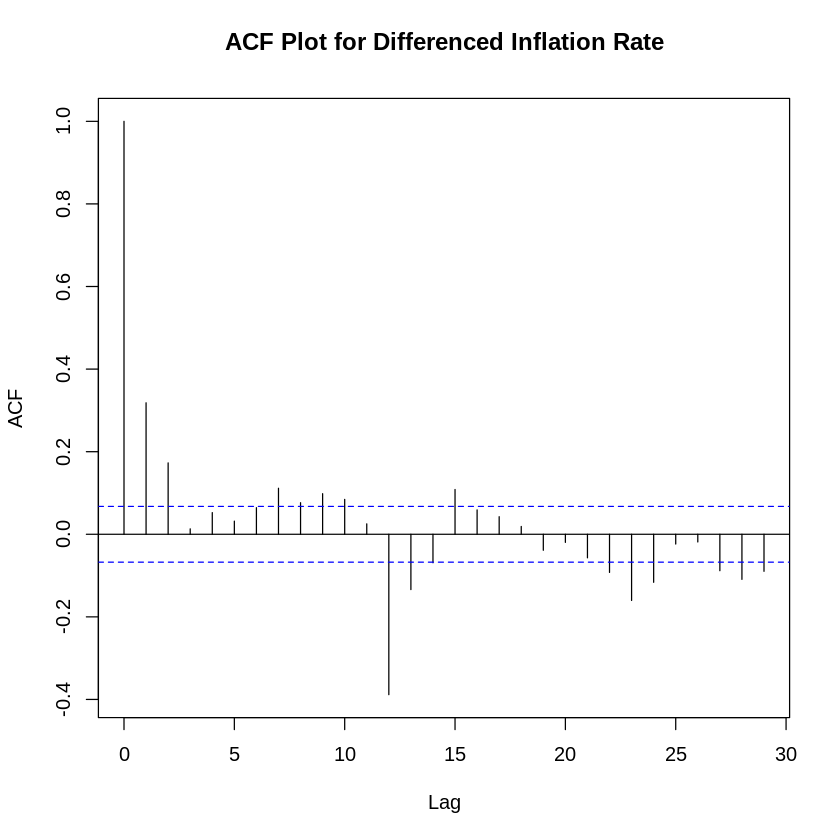

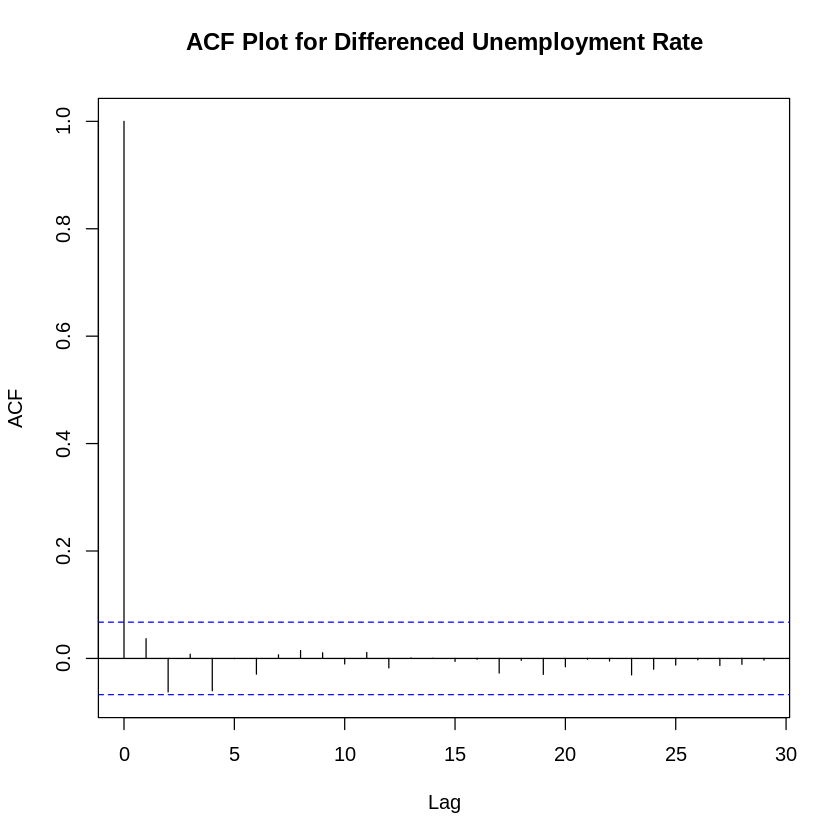

In [12]:
# Making ACF Plots for the Differenced Data
acf(interest_rates_data_diff$FEDFUNDS, main = "ACF Plot for Differenced FEDFUNDS")
acf(interest_rates_data_diff$Bonds.Yield, main = "ACF Plot for Differenced Bond Yields")
acf(interest_rates_data_diff$Inflation.Rate, main = "ACF Plot for Differenced Inflation Rate")
acf(interest_rates_data_diff$Unemployment.Rate, main = "ACF Plot for Differenced Unemployment Rate")

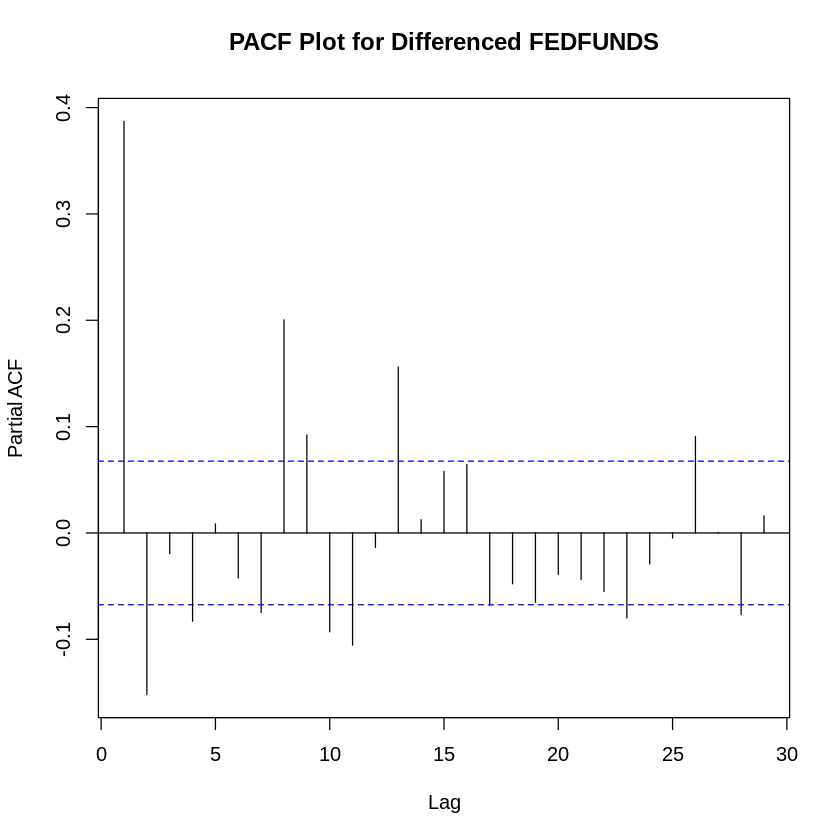

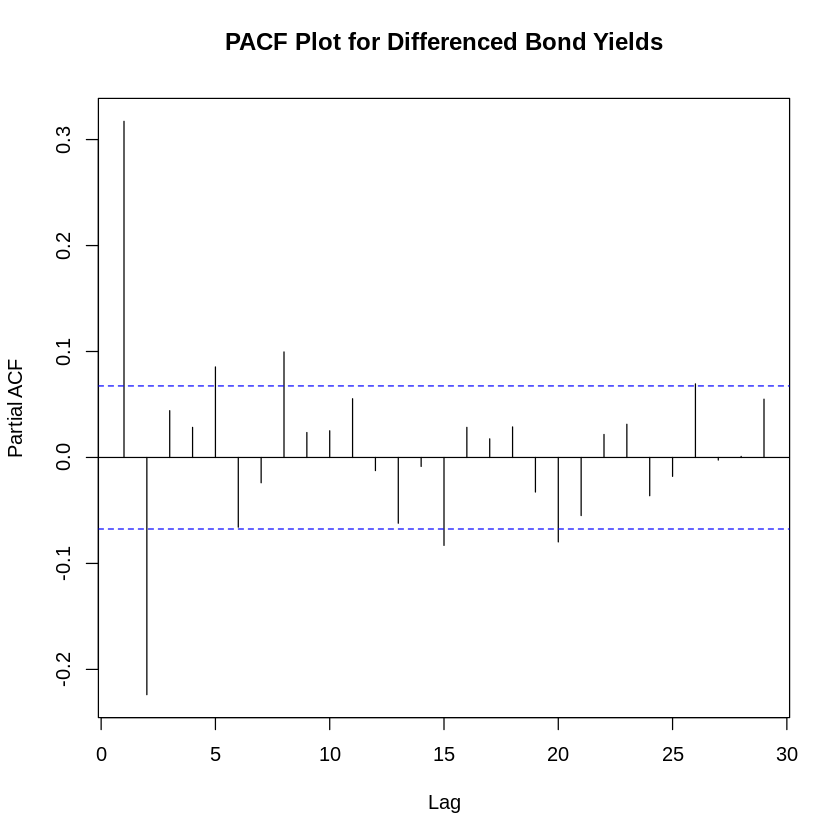

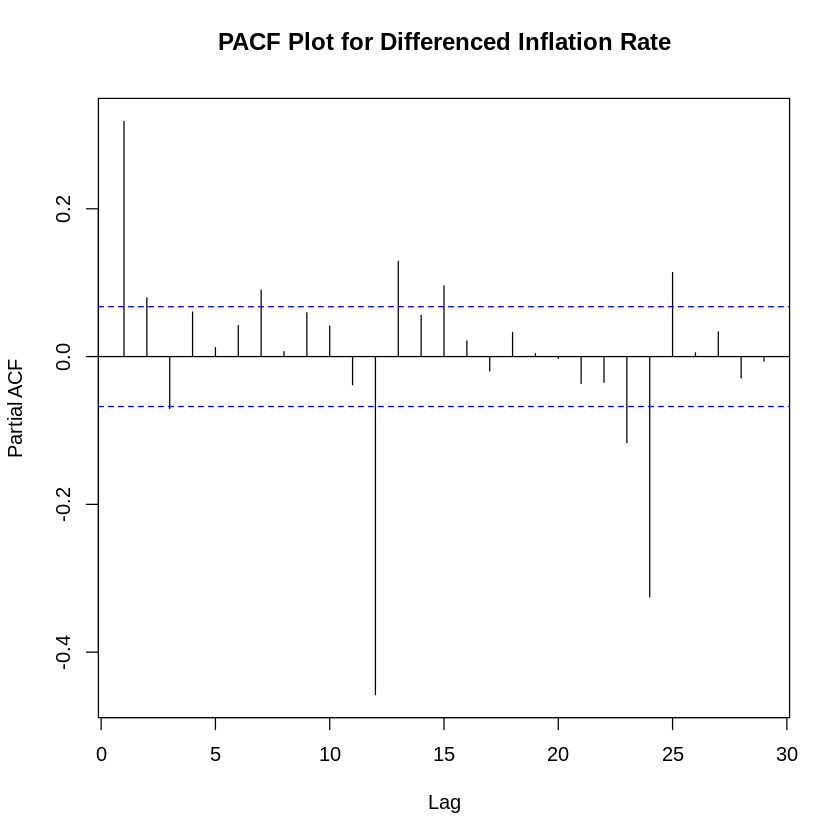

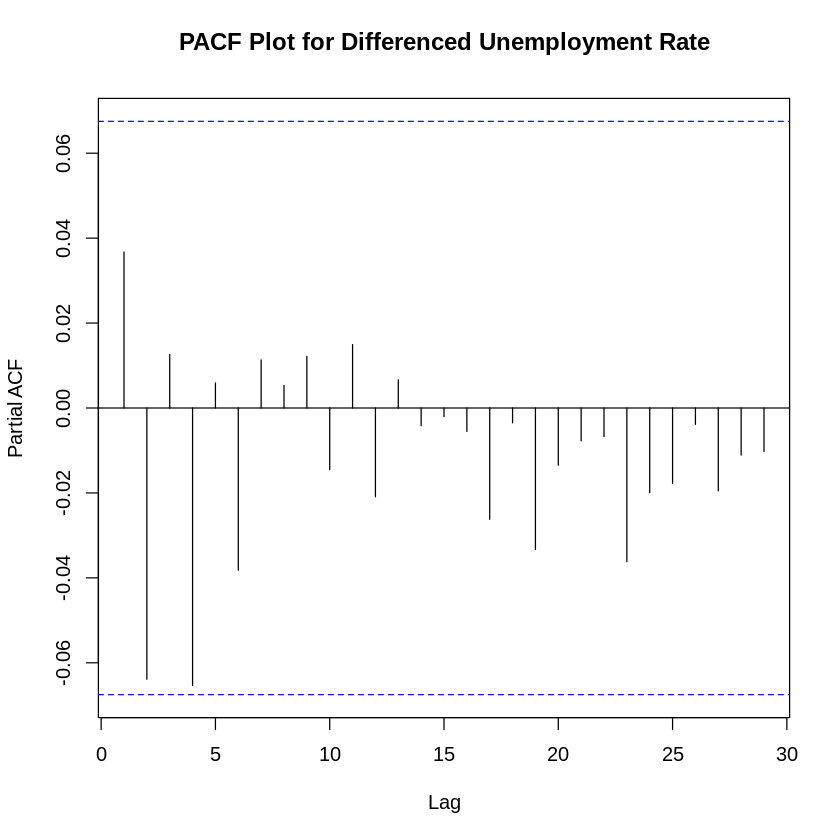

In [13]:
# Making PACF Plots for the Differenced Data
pacf(interest_rates_data_diff$FEDFUNDS, main = "PACF Plot for Differenced FEDFUNDS")
pacf(interest_rates_data_diff$Bonds.Yield, main = "PACF Plot for Differenced Bond Yields")
pacf(interest_rates_data_diff$Inflation.Rate, main = "PACF Plot for Differenced Inflation Rate")
pacf(interest_rates_data_diff$Unemployment.Rate, main = "PACF Plot for Differenced Unemployment Rate")

In [14]:
adf_FEDFUNDS_diff <- CADFtest(interest_rates_data_diff$FEDFUNDS, max.lag.y = 10)
print(adf_FEDFUNDS_diff)

adf_BondsYield_diff <- CADFtest(interest_rates_data_diff$Bonds.Yield, max.lag.y = 10)
print(adf_BondsYield_diff)


	ADF test

data:  interest_rates_data_diff$FEDFUNDS
ADF(10) = -9.0605, p-value = 3.041e-15
alternative hypothesis: true delta is less than 0
sample estimates:
     delta 
-0.7600665 


	ADF test

data:  interest_rates_data_diff$Bonds.Yield
ADF(10) = -7.2893, p-value = 7.933e-10
alternative hypothesis: true delta is less than 0
sample estimates:
     delta 
-0.6389386 



Thus, from the results of ADF test, we can say that our entire data is now stationary.

Plotting Individual Differenced Time Series

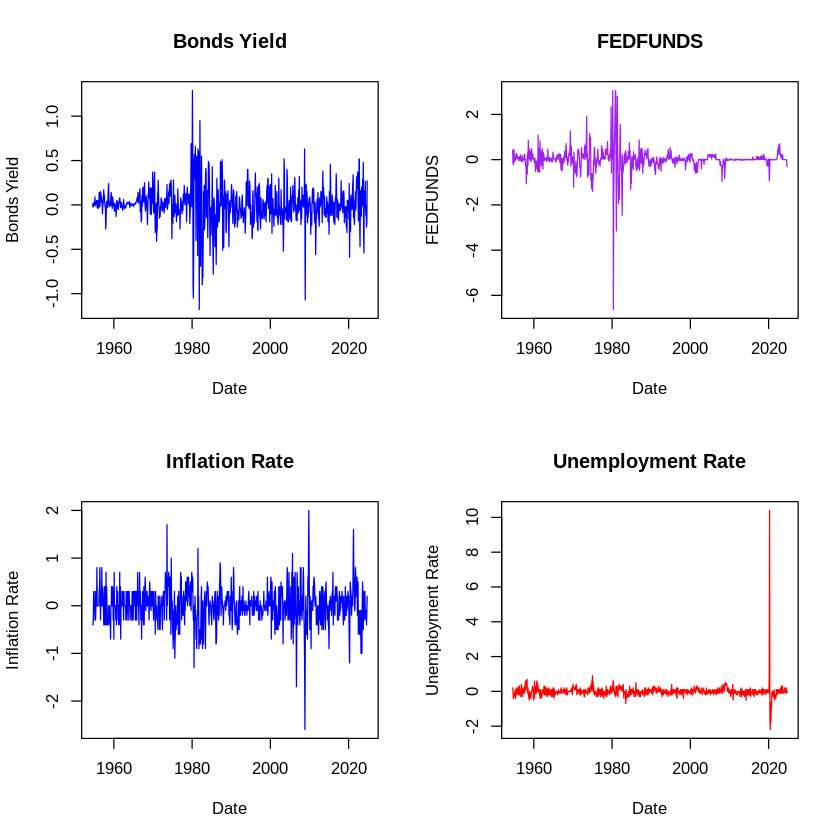

In [15]:
par(mfrow = c(2, 2))

plot(interest_rates_data_diff$Date, interest_rates_data_diff$Bonds.Yield, type = "l", col = "blue",
     xlab = "Date", ylab = "Bonds Yield", main = "Bonds Yield")
plot(interest_rates_data_diff$Date, interest_rates_data_diff$FEDFUNDS, type = "l", col = "purple",
     xlab = "Date", ylab = "FEDFUNDS", main = "FEDFUNDS")
plot(interest_rates_data_diff$Date, interest_rates_data_diff$Inflation.Rate, type = "l", col = "blue",
     xlab = "Date", ylab = "Inflation Rate", main = "Inflation Rate")
plot(interest_rates_data_diff$Date, interest_rates_data_diff$Unemployment.Rate, type = "l", col = "red",
     xlab = "Date", ylab = "Unemployment Rate", main = "Unemployment Rate")

In [16]:
head(interest_rates_data_diff)

,Date,Inflation.Rate,Unemployment.Rate,Bonds.Yield,FEDFUNDS
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
2,1954-08-01,-0.4,0.2,-0.02,0.42
3,1954-09-01,-0.4,0.1,0.02,-0.15
4,1954-10-01,-0.3,-0.4,-0.02,-0.22
5,1954-11-01,0.3,-0.4,0.02,-0.02
6,1954-12-01,-0.3,-0.3,0.01,0.45
7,1955-01-01,0.0,-0.1,0.03,0.11


Since the data is monthly, we create a time series object considering the frequency=12.

In [17]:
# Creating a Time Series Object for the dataset excluding the date column
ts_data <- ts(interest_rates_data_diff[, c("Inflation.Rate", "Unemployment.Rate", "Bonds.Yield", "FEDFUNDS")],
              start = c(1954, 8), frequency = 12)

In [ ]:
# print(ts_data)

In [18]:
# Computing the optimal lag order
max_p <- 3
max_q <- 3

# Initializing a matrix to store AIC values
aic_values <- matrix(NA, nrow = max_p + 1, ncol = max_q + 1)

# Loop over all combinations of p and q
for (p in 0:max_p) {
  for (q in 0:max_q) {
    try({
      model <- VARMA(ts_data, p = p, q = q)
      aic_values[p + 1, q + 1] <- model$aic
    }, silent = TRUE)  # Skip models that fail to converge
  }
}

rownames(aic_values) <- paste("p=", 0:max_p, sep = "")
colnames(aic_values) <- paste("q=", 0:max_q, sep = "")
print(aic_values)

Number of parameters:  20 
initial estimates:  0.0021 -3e-04 0.0015 0.0016 0.3048 -0.0168 -0.0081 0.0834 -0.0688 0.0189 0.1349 -0.098 0.0581 0.0059 0.3 0.0023 -3e-04 -0.0532 0.5086 0.3132 
Par. lower-bounds:  -0.0233 -0.0294 -0.0125 -0.0285 0.2379 -0.078 -0.1344 0.0281 -0.1453 -0.0512 -0.0097 -0.1613 0.0213 -0.0278 0.2305 -0.0281 -0.0796 -0.1258 0.3588 0.2477 
Par. upper-bounds:  0.0275 0.0288 0.0155 0.0318 0.3716 0.0444 0.1183 0.1387 0.0077 0.0889 0.2795 -0.0347 0.0949 0.0395 0.3695 0.0327 0.0789 0.0193 0.6584 0.3788 
Final   Estimates:  0.001920314 -0.001841468 0.001695112 0.001486146 0.3041759 -0.01775964 -0.007113941 0.08249125 -0.06690593 0.0213284 0.134004 -0.09682848 0.05767003 0.005619262 0.2998158 0.002424879 0.002045775 -0.05465351 0.508435 0.3121119 

Coefficient(s):
                   Estimate  Std. Error  t value Pr(>|t|)    
Inflation.Rate     0.001920    0.012619    0.152  0.87905    
Unemployment.Rate -0.001841    0.014439   -0.128  0.89852    
Bonds.Yield        0.0016

Warning message in nlminb(start = par, objective = LLKvarma, zt = da, p = p, q = q, :
“NA/NaN function evaluation”


Final   Estimates:  0.004175745 -0.0002454441 0.002391533 0.004156423 0.2680309 -0.01426774 -0.01535544 0.05884677 0.1399145 0.01195626 0.04453895 0.09917654 -0.07579452 0.01862945 0.1669006 -0.1432165 -0.05434698 -0.1001214 -0.0830519 -0.03256542 0.0505574 0.01271115 0.3682427 0.03678353 0.03603697 -0.005319662 -0.08357661 0.02569741 0.00368717 -0.06510572 0.526104 0.3621699 -0.01410389 -0.05699179 0.3211016 0.04187098 

Coefficient(s):
                    Estimate  Std. Error  t value Pr(>|t|)
Inflation.Rate     0.0041757         NaN      NaN      NaN
Unemployment.Rate -0.0002454         NaN      NaN      NaN
Bonds.Yield        0.0023915         NaN      NaN      NaN
FEDFUNDS           0.0041564         NaN      NaN      NaN
                   0.2680309         NaN      NaN      NaN
                  -0.0142677         NaN      NaN      NaN
                  -0.0153554         NaN      NaN      NaN
                   0.0588468         NaN      NaN      NaN
                   0.139914

Warning message in nlminb(start = par, objective = LLKvarma, zt = da, p = p, q = q, :
“NA/NaN function evaluation”


Final   Estimates:  0.002652496 -0.0004199733 0.001484255 0.0008100466 0.2699552 0.1773379 -0.4584537 0.1574366 -0.08266409 0.01692642 0.1723463 0.04838694 0.1079173 0.07879934 0.4016456 -0.1150446 0.08885445 -0.1293057 0.4446147 0.3087929 0.03063918 -0.1923863 0.4940316 -0.0997657 0.1521828 0.03786787 0.05139024 0.09458909 0.009632904 0.005115205 -0.05450326 0.07331287 0.01999683 0.005280581 -0.01229143 -0.1939794 -0.05655004 -0.1144246 -0.1765508 -0.0485176 0.03449855 0.01063705 0.02432136 -0.05951644 -0.04959972 -0.06474179 -0.04531967 0.1636328 -0.01092348 -0.02009069 -0.1973639 0.06855786 -0.05553585 -0.02727463 -0.01848267 -0.01172408 -0.1129293 0.06811291 0.1064406 0.04226718 -0.0560166 -0.03396117 -0.01176511 -0.09915418 -0.03178261 -0.07757745 -0.1307554 -0.03239716 

Coefficient(s):
                   Estimate  Std. Error  t value Pr(>|t|)
Inflation.Rate     0.002652         NaN      NaN      NaN
Unemployment.Rate -0.000420         NaN      NaN      NaN
Bonds.Yield        0.0

Warning message in nlminb(start = par, objective = LLKvarma, zt = da, p = p, q = q, :
“NA/NaN function evaluation”


Final   Estimates:  0.002372713 -0.0004432409 0.001799 0.00277383 0.2879952 0.2195585 -0.7051363 0.181357 0.08784978 0.05630438 0.3796758 -0.1279678 -0.1058877 0.02989766 0.06503097 0.05680552 0.1307768 0.5459826 -0.08632095 0.03724499 0.09312081 0.1323217 0.406418 -0.08140162 0.05042647 0.0937005 -0.2285026 -0.01126024 0.1709572 0.08648174 0.1941901 0.5750965 -0.1211938 0.1972864 -0.3497195 -0.3520428 0.01023483 -0.2343488 0.7402544 -0.1227179 0.07717516 -0.01412329 -0.2622475 0.2302203 -0.0327071 -0.004141876 -0.1590849 0.1132958 0.0416353 -0.008156639 0.09679234 -0.2046202 -0.1726342 -0.6589056 -0.05854511 -0.08081509 0.04693058 0.00479115 -0.06834716 0.008129192 -0.03424516 -0.1181105 -0.05073229 0.1295581 -0.05258715 -0.1132728 0.00305317 0.07597805 -0.04411092 -0.01839055 0.04627115 0.01398192 -0.1940123 -0.1468134 0.3560593 -0.2250097 0.07667978 -0.2161809 0.2423043 0.1958266 0.04491226 -0.06659127 0.06427894 0.133692 

Coefficient(s):
                    Estimate  Std. Error  t

Warning message in sqrt(diag(solve(Hessian))):
“NaNs produced”



Coefficient(s):
                   Estimate  Std. Error  t value Pr(>|t|)    
Inflation.Rate     0.003390    0.016597    0.204 0.838130    
Unemployment.Rate -0.002532    0.014154   -0.179 0.858012    
Bonds.Yield        0.002110    0.007136    0.296 0.767494    
FEDFUNDS           0.001557    0.011518    0.135 0.892490    
Inflation.Rate     0.149707    0.747774    0.200 0.841322    
Unemployment.Rate  0.151498    1.424390    0.106 0.915297    
Bonds.Yield       -0.425391    1.577107   -0.270 0.787369    
FEDFUNDS           0.142663    0.463696    0.308 0.758337    
Inflation.Rate     0.161905    0.093866    1.725 0.084553 .  
Unemployment.Rate  0.027081    0.034609    0.782 0.433925    
Bonds.Yield        0.086875    0.582160    0.149 0.881373    
FEDFUNDS           0.070679    0.341425    0.207 0.836002    
Inflation.Rate    -0.063005    0.037786   -1.667 0.095429 .  
Unemployment.Rate -0.004914    0.079038   -0.062 0.950430    
Bonds.Yield       -0.072413    0.392941   -0.184 0.85

Warning message in nlminb(start = par, objective = LLKvarma, zt = da, p = p, q = q, :
“NA/NaN function evaluation”


Final   Estimates:  0.002228705 -0.0005615377 0.001696728 0.001847957 0.3002547 0.2214416 -0.5580316 0.1539077 0.07493279 -0.08916156 0.3961313 -0.1432261 -0.06991801 -0.01316659 -0.05578062 0.07260198 -0.1216514 0.05627919 0.1277491 0.08132165 0.1035103 0.5105616 -0.2253437 0.0137418 0.06471377 0.01443979 0.05124727 0.009204786 0.0881719 0.1626511 0.4365425 -0.06233176 0.04265072 0.08078784 -0.2479911 -0.03276899 -0.02385905 -0.01186881 0.06397998 0.01923867 0.1626787 0.09791574 0.3929997 0.5952323 -0.1971704 0.01034386 -0.4185541 -0.3369858 0.05358371 -0.04925649 0.1434014 0.04460948 -0.001474358 -0.2354207 0.5905604 -0.09500012 0.07758263 0.1273681 -0.314785 0.2478503 0.05895122 -0.03495135 0.03439666 -0.2284658 -0.1423817 -0.6235303 0.04096092 -0.06413185 -0.03010447 -0.1481183 -0.08248484 0.1097445 -0.04252564 -0.1005598 -0.002049463 0.09410032 -0.1847273 -0.1589238 0.1555594 -0.2448463 0.1438766 -0.03108112 0.2302469 0.1676316 

Coefficient(s):
                    Estimate  Std. 

Warning message in nlminb(start = par, objective = LLKvarma, zt = da, p = p, q = q, :
“NA/NaN function evaluation”
Warning message in nlminb(start = par, objective = LLKvarma, zt = da, p = p, q = q, :
“NA/NaN function evaluation”


Final   Estimates:  0.002128328 -0.0008456858 0.001645818 0.002405264 0.3297938 0.6816762 -0.4942686 0.1906534 0.1287632 -0.003803025 0.2470026 -0.1484222 -0.2024742 -0.5184564 0.3438578 -0.06015564 -0.1307203 -0.01189297 0.1000679 0.09263668 0.1243598 0.5854651 -0.2032598 0.006871814 0.06698014 0.03460382 0.247152 -0.0413828 0.0801619 0.04716846 0.3958813 -0.06515796 0.0407028 0.09559914 -0.2134537 -0.03754112 0.02661597 0.1032523 0.02375815 0.02634114 0.1273706 -0.156331 0.2203301 0.5741134 -0.1178595 0.2868183 -0.5125757 -0.3280815 0.1342281 0.2267004 0.2834536 -0.1085912 -0.03531869 -0.6946176 0.5224989 -0.1337007 0.04285251 0.03408632 -0.2842461 0.3029049 0.1713743 0.5693613 -0.3806596 0.1761185 0.06591506 0.03266744 0.06255006 -0.2407028 -0.1642892 -0.695658 0.03368567 -0.06857314 -0.006759245 -0.03301987 -0.2745375 0.06909389 -0.02132431 -0.03326272 -0.03992886 0.1132033 -0.04402389 -0.1124058 -0.002346235 0.0855058 -0.07058074 -0.1320206 0.01808247 -0.004744516 -0.1505077 0.094

In [19]:
optimal_indices <- which(aic_values == min(aic_values, na.rm = TRUE), arr.ind = TRUE)

# Extract optimal p and q
optimal_p <- optimal_indices[1] - 1
optimal_q <- optimal_indices[2] - 1

cat("Optimal AR order (p):", optimal_p, "\n")
cat("Optimal MA order (q):", optimal_q, "\n")

Optimal AR order (p): 1 
Optimal MA order (q): 1 


We can say that we get **VARMA(1,1)** as the optimal Model.

In [20]:
# Fitting the Model with Optimal VARMA Order
optimal_VARMA_model <- VARMA(ts_data, p = optimal_p, q = optimal_q)

Number of parameters:  36 
initial estimates:  0.0013 -3e-04 0.0019 0.0019 0.511 0.0412 -0.1441 0.137 -0.034 0.0983 -0.222 0.0744 0.1821 0.0686 0.0099 -0.0391 0.1514 0.3998 0.3781 0.2459 -0.2444 -0.0579 0.1327 -0.0806 -0.043 -0.079 0.3888 -0.2166 -0.1312 -0.0559 0.358 0.0757 -0.1483 -0.4675 0.1511 0.1137 
Par. lower-bounds:  -0.024 -0.0293 -0.0118 -0.0281 0.3174 -0.2738 -0.4938 0.0102 -0.2558 -0.2625 -0.6225 -0.0708 0.077 -0.1023 -0.1798 -0.1079 -0.0778 0.0271 -0.0357 0.0959 -0.4511 -0.379 -0.2429 -0.2228 -0.2797 -0.4468 -0.0415 -0.3793 -0.2434 -0.2302 0.1542 -0.0014 -0.3928 -0.8474 -0.2934 -0.0544 
Par. upper-bounds:  0.0267 0.0287 0.0156 0.0318 0.7046 0.3562 0.2056 0.2638 0.1878 0.4591 0.1786 0.2196 0.2871 0.2395 0.1997 0.0297 0.3805 0.7726 0.7919 0.3959 -0.0377 0.2633 0.5084 0.0615 0.1938 0.2888 0.8191 -0.0538 -0.0191 0.1183 0.5619 0.1528 0.0963 -0.0875 0.5956 0.2819 
Final   Estimates:  0.001197947 7.524717e-05 0.001904103 0.002413249 0.5217732 0.05428132 -0.1491798 0.1823749 0.187

In [21]:
summary(optimal_VARMA_model)

          Length Class  Mode   
data      3372   mts    numeric
ARorder      1   -none- numeric
MAorder      1   -none- numeric
cnst         1   -none- logical
coef        36   -none- numeric
secoef      36   -none- numeric
residuals 3368   -none- numeric
Sigma       16   -none- numeric
aic          1   -none- numeric
bic          1   -none- numeric
Phi         16   -none- numeric
Theta       16   -none- numeric
Ph0          4   -none- numeric

In [ ]:
# Evaluating Model by performing Residual Diagnostics
# MTSdiag(optimal_VARMA_model)

In [22]:
# Forecasting for 2025 between January to April
forecast_result <- VARMApred(optimal_VARMA_model, h = 7)

# Extract FEDFUNDS forecast
forecast_values <- forecast_result$pred
forecast_SE <- forecast_result$se
print(forecast_values)

Predictions at origin  843 
     Inflation.Rate Unemployment.Rate Bonds.Yield   FEDFUNDS
[1,]       0.007026         0.0528228    0.119325  0.0793227
[2,]       0.004397        -0.0338577   -0.011206  0.0677154
[3,]       0.015676        -0.0026396    0.006941 -0.0001998
[4,]       0.008162        -0.0016891    0.002785 -0.0005710
[5,]       0.004845        -0.0005715    0.002454  0.0004730
[6,]       0.003415        -0.0004954    0.002135  0.0018581
[7,]       0.002973        -0.0004751    0.002058  0.0024703
Standard errors of predictions 
       [,1]   [,2]   [,3]   [,4]
[1,] 0.3644 0.4171 0.1964 0.4241
[2,] 0.3798 0.4233 0.2132 0.4771
[3,] 0.3863 0.4246 0.2136 0.4816
[4,] 0.3883 0.4248 0.2137 0.4822
[5,] 0.3889 0.4249 0.2137 0.4825
[6,] 0.3890 0.4249 0.2137 0.4827
[7,] 0.3891 0.4250 0.2137 0.4828
     Inflation.Rate Unemployment.Rate  Bonds.Yield      FEDFUNDS
[1,]    0.007025702      0.0528227799  0.119324514  0.0793227061
[2,]    0.004396723     -0.0338577139 -0.011206430  0.0677

In [23]:
# Combine original data and forecast
n_forecast <- nrow(forecast_values)
forecast_start <- end(ts_data)[1] + 1 / frequency(ts_data)

# Create a time index
time_index <- seq(from = start(ts_data)[1],
                  by = 1 / frequency(ts_data),
                  length.out = nrow(ts_data) + n_forecast)

# Combine data
combined_data <- list(
  Inflation_Rate = c(ts_data[, "Inflation.Rate"], forecast_values[, "Inflation.Rate"]),
  Unemployment_Rate = c(ts_data[, "Unemployment.Rate"], forecast_values[, "Unemployment.Rate"]),
  Bonds_Yield = c(ts_data[, "Bonds.Yield"], forecast_values[, "Bonds.Yield"]),
  FEDFUNDS = c(ts_data[, "FEDFUNDS"], forecast_values[, "FEDFUNDS"])
)

forecast_flag <- c(rep(FALSE, nrow(ts_data)), rep(TRUE, n_forecast))  # TRUE for forecast


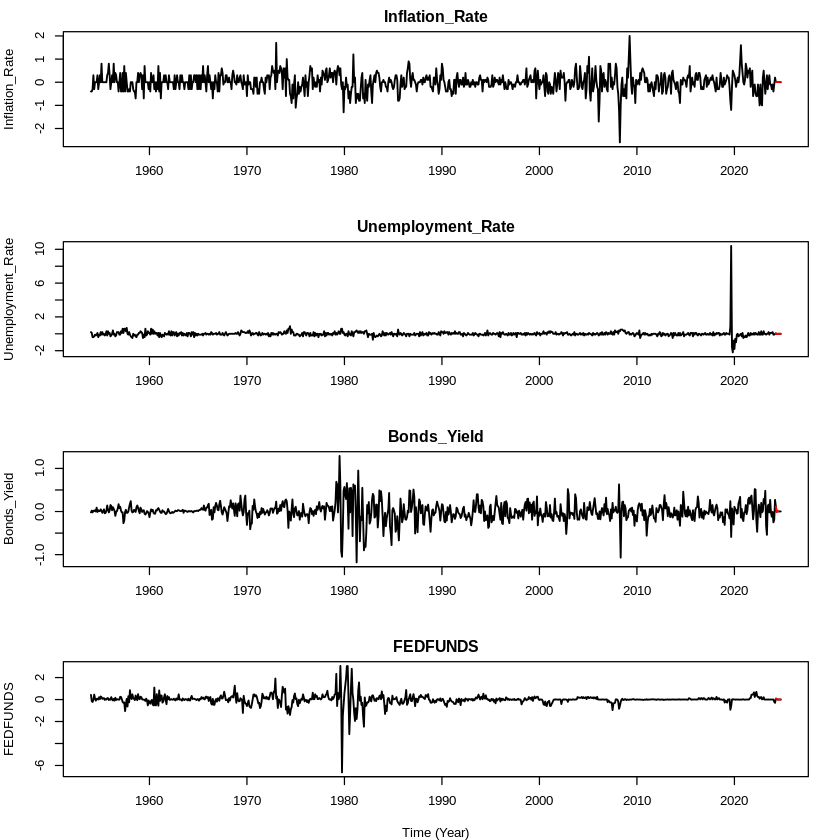

In [24]:
par(mfrow = c(4, 1), mar = c(4, 4, 2, 2))

# Plot each variable
for (var_name in names(combined_data)) {
  variable_data <- combined_data[[var_name]]

  # Plot original data
  plot(time_index, variable_data, type = "l", lwd = 1.5,
       xlab = ifelse(var_name == "FEDFUNDS", "Time (Year)", ""),
       ylab = var_name, main = var_name, ylim = range(variable_data, na.rm = TRUE))

  # Highlight forecast region
  forecast_data <- variable_data[forecast_flag]
  forecast_time <- time_index[forecast_flag]
  lines(forecast_time, forecast_data, col = "red", lwd = 1.5, lty = 2)
}


In [25]:
# Extracting the residuals for FEDFUNDS
resid_VARMA <- optimal_VARMA_model$residuals
# print(resid_VARMA)

In [26]:
colnames(resid_VARMA) <- colnames(ts_data)
head(resid_VARMA)

Inflation.Rate,Unemployment.Rate,Bonds.Yield,FEDFUNDS
-0.31132499,0.15458203,0.03044150,-0.261539166
-0.16923680,-0.43399506,-0.01462181,-0.118582172
0.42824753,-0.42970507,0.06157467,0.006900313
-0.36346630,-0.30677114,-0.01689125,0.339693633
0.02445588,-0.08459573,0.04933867,-0.054527743
-0.02502943,-0.22823555,-0.02123289,-0.163584755


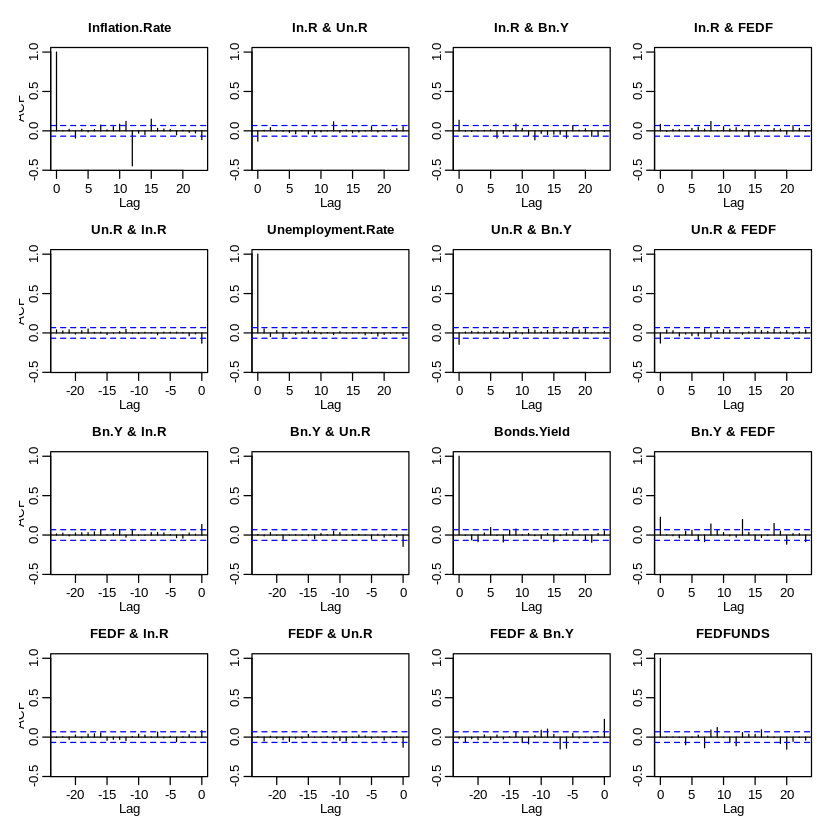

In [28]:
acf(resid_VARMA)

In [41]:
ljung_box_results <- apply(resid_VARMA, 2, function(res) {
  Box.test(res, type = "Ljung-Box", lag = 5)$p.value
})

print(ljung_box_results)

   Inflation.Rate Unemployment.Rate       Bonds.Yield          FEDFUNDS 
      0.164077713       0.247523105       0.003795937       0.154616904 


From the results of the Ljung-Box Statistic, we can say that as the p-value is greater than 0.05, we Fail to Reject H0 and hence the model is an adequate fit for the data.

Also, from the ACF Residuals Plot, The residuals for all variables are within the Confidence Interval and we can hardly see any correlation among the residuals, so the model is a adequate fit for the data.

## Checking Normality of Residuals for the VARMA Model

Quantile-Quantile (QQ) Plot

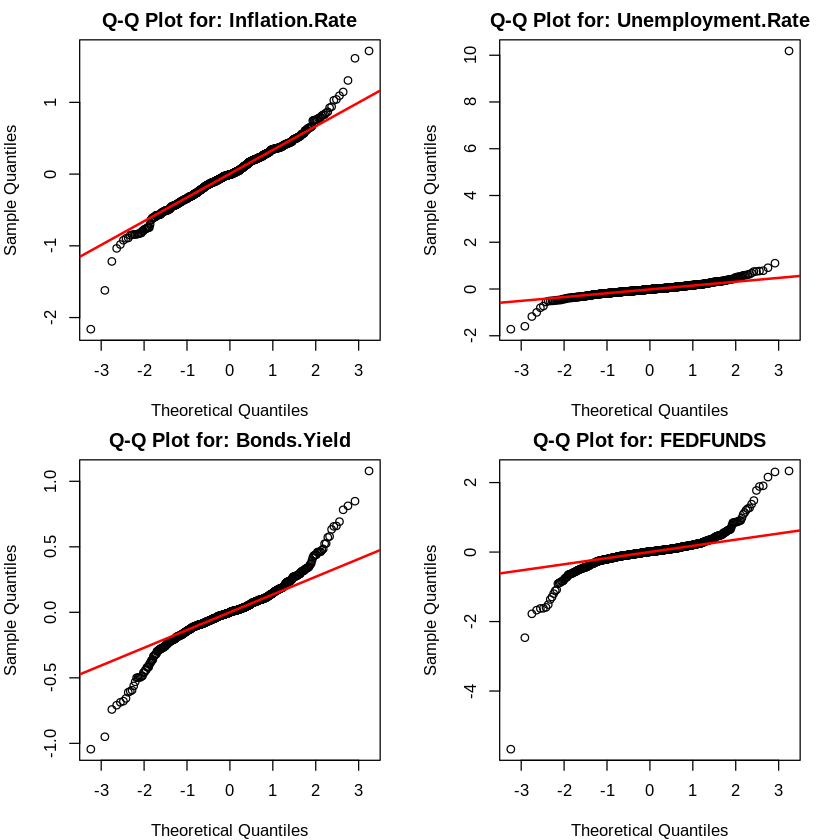

In [42]:
par(mfrow = c(2, 2), mar = c(4, 4, 2, 2))

for (i in 1:ncol(resid_VARMA)) {
  qqnorm(resid_VARMA[, i], main = paste("Q-Q Plot for:", colnames(resid_VARMA)[i]))
  qqline(resid_VARMA[, i], col = "red", lwd = 2)
}

From the QQ-plot, we can say that the residuals are partially normally distributed.

From the results of the Shapiro-Wilk test for Normality, we can say that as the p-values are less than 0.05, thus the data us not normally distributed.

## Evaluating Model Performance

To evaluate the performance of the model, we split the data into training and testing data.

In [29]:
split_ratio <- 0.8
train_size <- floor(split_ratio * nrow(ts_data))

In [30]:
train_data <- ts_data[1:train_size,]
test_data <- ts_data[(train_size + 1): nrow(ts_data),]

In [31]:
VARMA_model_train <- VARMA(train_data, p = optimal_p, q = optimal_q)

Number of parameters:  36 
initial estimates:  0.0025 0.004 9e-04 0.0026 0.5353 -0.0329 -0.4156 0.1744 -0.0068 0.5398 -0.0378 -0.0294 0.1698 0.0741 0.0925 -0.0469 -0.0434 -0.6346 0.4062 0.2612 -0.342 0.0271 0.4766 -0.1144 0.041 -0.5101 3e-04 0.0194 -0.13 -0.2002 0.291 0.0788 0.0634 0.1345 0.2197 0.0187 
Par. lower-bounds:  -0.0262 -0.0102 -0.0148 -0.0343 0.37 -0.3983 -0.7424 0.059 -0.0887 0.3587 -0.1998 -0.0866 0.079 -0.1267 -0.0871 -0.1103 -0.2561 -1.1049 -0.0145 0.1126 -0.5273 -0.3773 0.1146 -0.2493 -0.0508 -0.7106 -0.1791 -0.0475 -0.2318 -0.4225 0.0922 0.0046 -0.1752 -0.3861 -0.2462 -0.155 
Par. upper-bounds:  0.0312 0.0182 0.0167 0.0395 0.7005 0.3325 -0.0887 0.2897 0.0751 0.721 0.1242 0.0278 0.2606 0.2749 0.2721 0.0165 0.1693 -0.1642 0.827 0.4097 -0.1566 0.4315 0.8385 0.0205 0.1329 -0.3096 0.1797 0.0862 -0.0281 0.022 0.4899 0.1529 0.3021 0.6552 0.6857 0.1924 
Final   Estimates:  0.00361069 0.001163847 0.001653972 0.001465156 0.5836851 -0.1760044 -0.4901346 0.2452847 -0.03174511 0.7

Warning message in sqrt(diag(solve(Hessian))):
“NaNs produced”



Coefficient(s):
                   Estimate  Std. Error  t value Pr(>|t|)    
Inflation.Rate     0.003611    0.010308    0.350 0.726119    
Unemployment.Rate  0.001164    0.003167    0.368 0.713210    
Bonds.Yield        0.001654    0.011728    0.141 0.887845    
FEDFUNDS           0.001465    0.022379    0.065 0.947800    
Inflation.Rate     0.583685    0.106120    5.500 3.79e-08 ***
Unemployment.Rate -0.176004    0.263067   -0.669 0.503464    
Bonds.Yield       -0.490135         NaN      NaN      NaN    
FEDFUNDS           0.245285    0.093435    2.625 0.008660 ** 
Inflation.Rate    -0.031745         NaN      NaN      NaN    
Unemployment.Rate  0.720955         NaN      NaN      NaN    
Bonds.Yield        0.124194    0.190172    0.653 0.513716    
FEDFUNDS          -0.081268    0.067058   -1.212 0.225549    
Inflation.Rate     0.174018    0.038574    4.511 6.44e-06 ***
Unemployment.Rate  0.184074    0.163780    1.124 0.261051    
Bonds.Yield       -0.064609    0.164744   -0.392 0.69

In [32]:
forecast_horizon_test <- nrow(test_data)
forecast_result_test <- VARMApred(VARMA_model_train, h = forecast_horizon_test)

Predictions at origin  674 
       Inflation.Rate Unemployment.Rate Bonds.Yield   FEDFUNDS
  [1,]       0.023977        -0.0073685    0.051263  7.108e-02
  [2,]       0.011213        -0.0043200    0.001653  2.838e-02
  [3,]       0.017068        -0.0044079    0.002901  6.598e-03
  [4,]       0.014545        -0.0027319    0.003671  2.856e-03
  [5,]       0.011483        -0.0010436    0.003465  1.934e-03
  [6,]       0.009273         0.0003201    0.003250  1.179e-03
  [7,]       0.007663         0.0014080    0.003125  4.941e-04
  [8,]       0.006425         0.0022836    0.003048 -8.037e-05
  [9,]       0.005445         0.0029914    0.002995 -5.503e-04
 [10,]       0.004660         0.0035643    0.002955 -9.323e-04
 [11,]       0.004026         0.0040284    0.002924 -1.242e-03
 [12,]       0.003514         0.0044044    0.002899 -1.494e-03
 [13,]       0.003099         0.0047091    0.002879 -1.698e-03
 [14,]       0.002764         0.0049560    0.002862 -1.863e-03
 [15,]       0.002492      

In [33]:
predictions <- forecast_result_test$pred

In [34]:
rmse_values <- numeric(ncol(test_data))
# r2_values <- numeric(ncol(test_data))
mae_values <- numeric(ncol(test_data))

In [35]:
for (i in 1:ncol(test_data)) {
  actual <- test_data[, i]
  pred <- predictions[, i]

  rmse_values[i] <- rmse(actual, pred)
  mae_values[i] <- mae(actual, pred)
  # ss_total <- sum((actual - mean(actual, na.rm = TRUE))^2, na.rm = TRUE)
  # ss_residual <- sum((actual - pred)^2, na.rm = TRUE)
  # r2_values[i] <- 1 - (ss_residual / ss_total)
}

In [37]:
performance_metrics <- data.frame(
  Variable = colnames(test_data),
  RMSE = rmse_values,
  MAE = mae_values
)

In [38]:
print(performance_metrics)

           Variable      RMSE        MAE
1    Inflation.Rate 0.3776483 0.28669346
2 Unemployment.Rate 0.8625667 0.23116760
3       Bonds.Yield 0.1849006 0.13805522
4          FEDFUNDS 0.1562241 0.06943604
